I modify some functions of the *simplicial* library (https://simplicial.readthedocs.io/en/latest/)

In [1]:
import networkx as nx
import json
import numpy as np
from simplicial import simplicialcomplex as sc
from simplicial import embedding, drawing
import collections

%matplotlib inline 
import matplotlib.pyplot as plt

Loading data (list of cliques) from the file 'filename'

In [ ]:
#filename = ' '

cliques = json.load(open(filename,'r'))

In [ ]:
SC = sc.SimplicialComplex()

for i, clique in enumerate(cliques):
    try:
        SC.addSimplexWithBasis(bs=clique)
    except Exception:
        continue

In [4]:
# Creating a networkx graph from the cliques
G = nx.Graph()
for clique in cliques:
    for i, j in combinations(clique, 2):
        G.add_edge(i, j)
        
# creating a position dictionary
pos=nx.spring_layout(G)

# creating an embedding from the simplicial complex
em = embedding.Embedding(SC, dim=2)

# using the position of the nodes from the graph in the embedding
for node, coords in pos.iteritems():
    em.positionSimplex(node, pos=tuple(coords))

In [6]:
def my_draw_complex( c, em, ax = None, node_size = 0.02):
    
    # fill in the argument defaults where not specified
    if ax is None:
        # main figure axes
        ax = plt.gca()
        
    # set up the axes
    ax.set_xlim([-1.1, 1.1])      # axes bounded around 1
    ax.set_ylim([-1.1, 1.1])
    ax.grid(False)                # no grid
    ax.get_xaxis().set_ticks([])  # no ticks on the axes
    ax.get_yaxis().set_ticks([])
    ax.axis('off')
       
    # draw the node markers
    for s in c.simplicesOfOrder(0):
        (x, y) = em[s]
        circ = plt.Circle([ x, y ],
                          radius = node_size,
                          edgecolor = 'Black', facecolor = u'#ff7f0e',
                          zorder = 3, lw=0.5)
        ax.add_patch(circ)
        
    # draw the edges
    for s in c.simplicesOfOrder(1):
        fs = list(c.basisOf(s))
        (x0, y0) = em[fs[0]]
        (x1, y1) = em[fs[1]]
        line = plt.Line2D([ x0, x1 ], [y0, y1 ],
                          color = 'black', # color = color_simplex(c, s, 1),
                          zorder = 1, lw=0.7)
        ax.add_line(line)
    
    # fill in the triangles
    for s in c.simplicesOfOrder(2):
        fs = list(c.basisOf(s))
        (x0, y0) = em[fs[0]]
        (x1, y1) = em[fs[1]]
        (x2, y2) = em[fs[2]]
        tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                          edgecolor = 'black', facecolor = plt.cm.Blues(0.6),
                          zorder = 2, alpha=0.4, lw=0.5)
        ax.add_patch(tri);


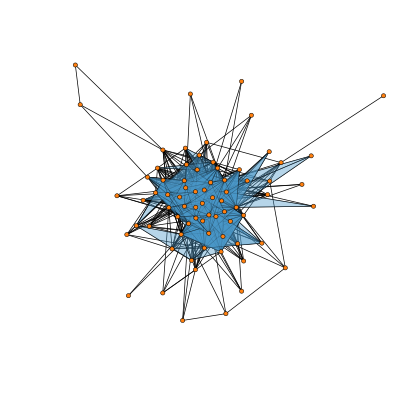

In [12]:
fig = plt.figure(figsize=(10,10));
ax=plt.subplot(111)

my_draw_complex(c=SC, em=em, ax=ax, node_size=0.012);